# KoNLPy 사용법
---
 - Okt (Twitter) class
   - morphs(텍스트) : 텍스트에서 형태소 반환
   - nouns(텍스트) : 텍스트에서 명사만 반환
   - phrases(텍스트) : 텍스트에서 어절을 반환
   - pos(텍스트, [norm=False, stem=False])
     - 텍스트에서 품사 정보를 부착하여 반환
     - 각 형태소를 품사와 함께 리스트로 반환
     - norm=False: 정규화
       - 같은 의미이면서 표현이 다른 단어를 통합
     - stem=False: 어간 찾기
       - 단어의 의미를 담고 있는 단어의 핵심 부분 추출

==================================================
##### 간단 예제

In [11]:
from konlpy.tag import Kkma, Komoran, Okt

# Open Korean Text (과거 트위터 형태소 분석기)
okt = Okt()
text = "마음에 꽂힌 칼한자루 보다 마음에 꽂힌 꽃한송이가 더 아파서 잠이 오지 않는다"

# pos(text): 문장의 각 품사를 태깅
# norm=True: 문장을 정규화, stem=True: 어간을 추출

okt_tags = okt.pos(text, norm=True, stem=True)
print(okt_tags)

# nouns(text): 명사만 리턴
okt_nouns = okt.nouns(text)
print(okt_nouns)

[('마음', 'Noun'), ('에', 'Josa'), ('꽂히다', 'Verb'), ('칼', 'Noun'), ('한', 'Determiner'), ('자루', 'Noun'), ('보다', 'Verb'), ('마음', 'Noun'), ('에', 'Josa'), ('꽂히다', 'Verb'), ('꽃', 'Noun'), ('한송이', 'Noun'), ('가', 'Josa'), ('더', 'Noun'), ('아프다', 'Adjective'), ('잠', 'Noun'), ('이', 'Josa'), ('오지', 'Noun'), ('않다', 'Verb')]
['마음', '칼', '자루', '마음', '꽃', '한송이', '더', '잠', '오지']


==================================================
##### 예제1

In [10]:
from konlpy.tag import Okt
text = '나랏말이 중국과 달라 한자와 서로 통하지 아니하므로, \
우매한 백성들이 말하고 싶은 것이 있어도 마침내 제 뜻을 잘 표현하지 못하는 사람이 많다.\
내 이를 딱하게 여기어 새로 스물여덟 자를 만들었으니, \
사람들로 하여금 쉬 익히어 날마다 쓰는 데 편하게 할 뿐이다.'

okt = Okt()

# morphs(text): 텍스트를 형태소 단위로 나눔
okt_morphs = okt.morphs(text)
print('morphs():\n', okt_morphs)

# 명사만 추출
okt_nouns = okt.nouns(text)
print('nouns():\n', okt_nouns)

# phrases(text): 어절 추출
okt_phrases = okt.phrases(text)
print('phrases():\n', okt_phrases)

# pos(text): 품사를 태깅
okt_pos = okt.pos(text)
print('pos():\n', okt_pos)

morphs():
 ['나랏말', '이', '중국', '과', '달라', '한자', '와', '서로', '통', '하지', '아니하므로', ',', '우매', '한', '백성', '들', '이', '말', '하고', '싶은', '것', '이', '있어도', '마침내', '제', '뜻', '을', '잘', '표현', '하지', '못', '하는', '사람', '이', '많다', '.', '내', '이를', '딱하게', '여기어', '새로', '스물', '여덟', '자를', '만들었으니', ',', '사람', '들', '로', '하여금', '쉬', '익히어', '날', '마다', '쓰는', '데', '편하게', '할', '뿐', '이다', '.']
nouns():
 ['나랏말', '중국', '달라', '한자', '서로', '통', '우매', '백성', '말', '것', '마침내', '제', '뜻', '표현', '사람', '내', '스물', '여덟', '사람', '쉬', '날', '데', '뿐']
phrases():
 ['나랏말', '중국', '중국과 달라', '중국과 달라 한자', '중국과 달라 한자와 서로', '중국과 달라 한자와 서로 통', '우매', '백성들', '마침내', '마침내 제', '마침내 제 뜻', '표현', '못하는 사람', '스물여덟', '사람들', '달라', '한자', '서로', '사람', '스물', '여덟']
pos():
 [('나랏말', 'Noun'), ('이', 'Josa'), ('중국', 'Noun'), ('과', 'Josa'), ('달라', 'Noun'), ('한자', 'Noun'), ('와', 'Josa'), ('서로', 'Noun'), ('통', 'Noun'), ('하지', 'Verb'), ('아니하므로', 'Adjective'), (',', 'Punctuation'), ('우매', 'Noun'), ('한', 'Josa'), ('백성', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('말', 'Noun'

In [5]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform

# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = open('./4일차 수업소스/test.txt',encoding='utf-8').read()

# Open Korean Text 객체 생성
okt = Okt() 

# okt함수를 통해 읽어 들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = okt.pos(text)
noun_adj_list = []

# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어줌
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']:
        noun_adj_list.append(word)

# 가장 많이 나온 단어부터 40개를 저장
counts = Counter(noun_adj_list)         # 리스트 항목의 개수를 딕셔너리 형태로 리턴
tags = counts.most_common(40)           # most_common(n): 가장 많은 수를 가지는항목 n개 반환
print(tags)

[('세대', 89), ('소비', 17), ('등', 16), ('이', 14), ('유튜브', 14), ('것', 13), ('명', 12), ('있다', 11), ('수', 11), ('를', 10), ('선호', 10), ('더', 9), ('자신', 9), ('영향', 9), ('크리에이터', 9), ('트렌드', 8), ('점', 8), ('있는', 8), ('중', 8), ('다른', 7), ('특징', 7), ('문화', 7), ('가장', 7), ('취미', 7), ('콘셉트', 7), ('중시', 6), ('현재', 6), ('달리', 6), ('통해', 6), ('브랜드', 6), ('대표', 5), ('같은', 5), ('젊은', 5), ('온라인', 5), ('대비', 5), ('만족', 5), ('편이', 5), ('제품', 5), ('플렉스', 5), ('경우', 4)]


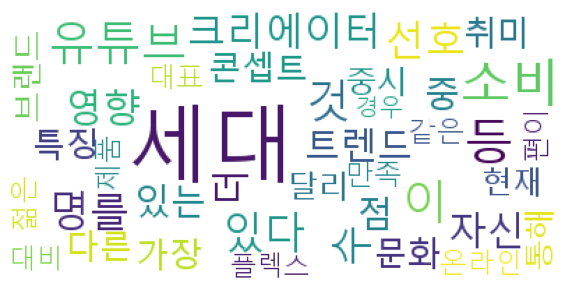

In [9]:
# wc 한글 글꼴
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

# WordCloud를 생성
wc = WordCloud(font_path=path, background_color="white", max_font_size=60) # 가장 빈도 높은 단어 크기   
cloud = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 저장
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()


==================================================
##### 예제:Naver

['CJ의 혁신…빅데이터 이용했더니 택배상자 크기가 10% 줄었다', '도로교통공단, 빅데이터 플랫폼 구축 위한 표준화 사업 착수', '"112억 경우의 수 조합"…CJ대한통운 빅데이터로 택배박스 최적화', '총상금 1100만원, ‘빅데이터로 한강 수위 예측하라’', '[필수 노동 실태보고서]③ 빅데이터로 추적한 필수 노동자…분석 의미는?', "CJ대한통운 '빅데이터 패키징' 택배박스 크기 10% 축소", "CJ '빅데이터 패키징', 배송상자 크기 줄여", '서울보증보험, 보증보험 브랜드평판 7월 빅데이터 분석 톱', '골프장 브랜드평판 7월 빅데이터 분석결과', 'CJ대한통운, 빅데이터 설계로 택배상자 크기 평균 10% 줄여', '회사의 데이터를 달라, 그럼 문제를 풀어주겠다', '"112억 경우의 수 조합"…CJ대한통운 빅데이터로 택배박스 최적화', '코웨이, 가정용품 상장기업 브랜드평판 7월 빅데이터 분석 1위 기록', "쑥쑥 크는 빅테크 '경고등'에...SKT-하나금융, 4300억짜리 혈맹 맺다", '[빅데이터투데이] 기초자치단체 2022년 7월 브랜드평판 랭킹... 1위 용산구, 2위 강남구, 3위 종로구', "CJ대한통운 '빅데이터 패키징' 택배박스 크기 10% 축소", 'SKT-하나금융 MOU…통신+금융지주 ‘짝짓기’, 빅블러시대 앞당기나', '한수원, 빅데이터 활용 한강 수위예측 AI 경진대회 열려', 'CJ대한통운, 빅데이터로 배송박스 크기 10% 줄여', '대전시, 공직자 대상 데이터 역량 강화교육']
[('CJ', 'Alpha'), ('의', 'Noun'), ('혁신', 'Noun'), ('…', 'Punctuation'), ('빅데이터', 'Noun'), ('이용', 'Noun'), ('했더니', 'Verb'), ('택배', 'Noun'), ('상자', 'Noun'), ('크기', 'Noun'), ('가', 'Josa'), ('10%', 'Number'), ('줄었다', 'Verb')]
-----------------------------

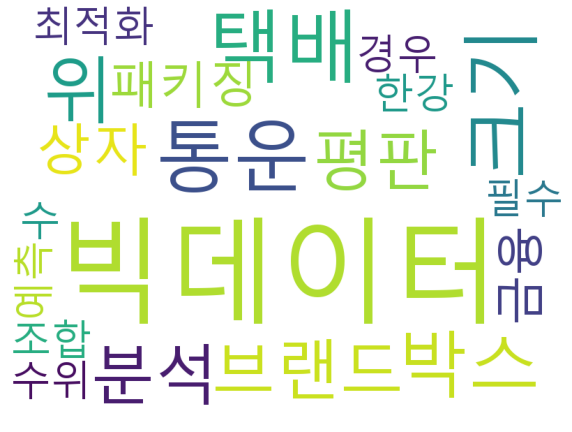

In [1]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import re
import platform

def get_titles(start_num, end_num, search_word, title_list):
    
    # start_num ~ end_num까지 크롤링
    while 1:
        if start_num > end_num:
            break
        
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.format(search_word, start_num)
        req = requests.get(url)
        time.sleep(1)
    
        if req.ok: # 정상적인 request 확인
            soup = BeautifulSoup(req.text, 'html.parser')
            
            # 뉴스제목 뽑아오기
            list_news = soup.find('ul', {'class' : 'list_news'})
            #li_list = list_news.find_all('li', {'id': re.compile('sp_nws.*')})
            
            li_bxs = list_news.find_all('li', {'class': 'bx'})
            for li_bx in li_bxs:
                news_title = li_bx.find('a', {'class':'news_tit'})
                title_list.append(news_title['title'])
        start_num += 10
    print(title_list)
    
def make_wordcloud(word_count, title_list):
    okt = Okt()
    
    sentences_tag = []
    
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 30)
    
    print(sentences_tag)
    print('\n' * 3)
    
    noun_adj_list = []
    
    # 명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    
    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print(tags)

    # 한글꺠지는 문제 해결하기위해 font_path 지정
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    
    # wordCloud생성
    wc = WordCloud(font_path=path, background_color='white', width=800, height=600)
    print(dict(tags))
    
    cloud = wc.generate_from_frequencies(dict(tags))
    
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    
if __name__ == '__main__':
    search_word = "빅데이터" # 검색어 지정
    title_list = []
    
    # 1~20번게시글 까지 크롤링
    get_titles(1, 20, search_word, title_list)
    
    # 단어 20개까지 wordcloud로 출력
    make_wordcloud(20, title_list)
